# Содержание


- [Создание и обучение модели](#3)
    - [Подготовка данных для обучения](#31)
    - [Обучение моделей](#33)
        - [Метод к-ближайших соседей](#331)

# Создание и обучение модели <a id="3"></a>

На этом шаге происходит обучение модели. Обучение моделей машинного обучения происходит итерационно - пробуются различные модели, перебираются гиперпараметры, сравниваются значения выбранной метрики и выбирается лучшая комбинация.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("cleaned_dataset.csv", index_col=0)

In [3]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,0,35,170,75,90.0,1.0,1.0,1,1,120,...,126,92,17.1,1,1.0,21,35,40,1,1
1,0,30,180,80,89.0,0.9,1.2,1,1,130,...,148,121,15.8,1,0.9,20,36,27,3,0
2,0,40,165,75,91.0,1.2,1.5,1,1,120,...,74,104,15.8,1,0.9,47,32,68,1,0
3,0,50,175,80,91.0,1.5,1.2,1,1,145,...,104,106,17.6,1,1.1,29,34,18,1,0
4,0,50,165,60,80.0,1.0,1.2,1,1,138,...,117,104,13.8,1,0.8,19,12,25,1,0


## Подготовка данных для обучения <a id="31"></a>

Вначале нужно определить, на каких данных будет обучаться модель, а на каких тестироваться. **Традиционный подход** - это разделение исходного набора данных на 3 части (обучение, валидация и тестирование) с пропорции 60/20/20. В данном случае обучающая выборка используется для обучения модели, а валидация и тестирование для получения значения метрики без эффекта переобучения.

Однако существует и другой подход к разбиению данных - разделение на 2 части (обучение и тестирование) по правилу 80-20 (80% тренировочный, 20% тестовый). Зачастую данный метод применяется в тех случаях, когда отсутствует достаточное количество данных как в обучающем, так и в проверочном наборе.  

Перед тем как начать разбивать данные необходимо выделить из исходного набора данных целевую переменную (столбец `DRK_YN`) и сохранить её в отдельную переменную. Ниже приведён код разделения:

In [4]:
x = df.drop(columns=["DRK_YN"], axis=1)
y = df["DRK_YN"]

В ходе выполнения данной работы будет использован подход с разделением исходной выборки на 2 части с пропорцией 80-20, поскольку данный способ является самым популярным способом разбиения данных. Для того, чтобы разбить данные таким образом, существует специальный метод `train_test_split` в библиотеке `scikit-learn`.

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

### Метод к-ближайших соседей <a id="331"></a>

**Алгоритм KNN** (k-nearest Neighbors) - типичный пример *ленивого ученика*. Ученик называется "ленивым" не из-за своей очевидной простоты, а оттого, что он не узнаёт различающую функцию из обучающих данных, а взамен запоминает обучающий набор данных.

Сам алгоритм KNN довольно прямолинеен и может быть подытожен в виде следующих шагов:
1) Выбрать число $k$ и метрику расстояния;
2) Найти $k$ ближайших соседей образца, который нужно классифицировать;
3) Назначить метку класса по большинству голосов.



Базируясь на выбранной метрике расстояния, алгоритм KNN находит в обучающем наборе данных $k$ образцов, ближайших (или наиболее похожих) к точке, которую необходимо классифицировать. Затем метка класса для точки данных определяется на основе мажоритарного голосования среди её $k$ ближайших соседей

Главное преимущество такого основанного на памяти подхода в том, что классификатор немедленно адаптируется по мере накопления нами новых обучающих данных. Тем е менее, недостаток связан с тем, что вычислительная сложность классификации новых образцов при худшем сценарии растёт линейно с увеличением количества образцов в обучающем наборе данных. Кроме того, мы не можем отбрасывать обучающие образцы ввиду отсутствия шага *обучения*. Таким образом, при работе с крупными наборами данных проблемой может стать пространство хранения.

*Правильный* выбор $k$ критически важен для нахождения хорошего баланса между переобучением и недообучением. Также необходимо обеспечить выбор метрики расстояния, подходящей для признаков в наборе данных. Для образцов с вещественными значениями часто применяется простая мера - евклидово расстояние. Однако при использовании меры в виде евклидова расстояния также важно **стандартизировать данные**, чтобы каждый признак в равной степени вносил вклад в расстояние.

Далее, перейдём к практической части работы с данной моделью, а именно создадим экземпляр данной модели, подберём наилучшую комбинацию гиперпараметров, обучим модель и оценим точность предсказаний. Практическая реализация данной модели находится в библиотеке `scikit-learn`, поэтому импортируем из неё все необходимые компоненты в проект.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

Можно заметить, что помимо классификационной модели были также импортированы и другие компоненты из данной библиотеки. Таковыми компонентами стали `StandardScaler`, `Pipeline` и `GridSearchCV`. 

Модуль `preprocessing` в **scikit-learn** предоставляет класс `StandardScaler`, который является быстрым и простым способом стандартизации набора данных. Стандартизация наборов данных является общим требованием для многих моделей машинного обучения, реализованных в **scikit-learn**. Если отдельные признаки не похожи на стандартные нормально-распределённые данные (Гауссовские с нулевым средним значением и единичной дисперсией), то модели могут работать некорректно.

Для создания составной модели преобразователи данных обычно объединяются с другими преобразователями или моделями. Преобразователи данных - это алгоритмы, которые изменяют данные, например, `StandardScaler`. Наиболее распространенным инструментом для создания составных моделей является `Pipeline` (или конвейер). Конвейер полезен, поскольку обычно существует фиксированная последовательность шагов при обработке данных, например, выбор признаков => нормализация => классификация.

Гиперпараметры - это параметры, которые непосредственно влияют на обучение модели. В **scikit-learn** они передаются в качестве аргументов конструктору класса оценщиков. И для того, чтобы не проверять вручную каждый гиперпараметр у каждой из моделей в **scikit-learn** предусмотрены два общих подхода к поиску параметров: `GridSearchCV` исчерпывающе рассматривает все комбинации параметров, в то время как `RandomizedSearchCV` может выбирать заданное количество кандидатов из пространства параметров с заданным распределением. Но, поскольку `GridSearchCV` может выполнятся достаточно долго, будем использовать более оптимизированную его версию - `HalvingGridSearchCV`.

In [7]:
import chime
%load_ext chime 

Далее создадим конвейер из двух составляющих: стандартизатора и самого классификатора.

In [8]:
# Создаем стандартизатор
standardizer = StandardScaler()

# Создаем классификатор
knn = KNeighborsClassifier(n_jobs=-1)

# Создаём конвейер
pipe = Pipeline([("standardizer", standardizer), ("knn", knn)])

Затем, определим гиперпараметры, от которых зависит классификатор и которые будут перебираться в процессе кросс-валидации:  

In [9]:
params = {
        "knn__n_neighbors": np.arange(5, 15),
        "knn__metric": ["minkowski", "euclidean", "manhattan"],
    }


Запустим процесс кросс-валидации и выведем наилучшую комбинацию гиперпараметров для данного классификатора:

In [10]:
%%time
%%chime
knn_classifier = HalvingGridSearchCV(
    estimator=pipe,
    param_grid=params,
    factor=3,
    cv=5, verbose=1,
    n_jobs=-3,
    scoring="roc_auc").fit(x_train, y_train)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 29372
max_resources_: 793048
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 30
n_resources: 29372
Fitting 5 folds for each of 30 candidates, totalling 150 fits
----------
iter: 1
n_candidates: 10
n_resources: 88116
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 2
n_candidates: 4
n_resources: 264348
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 3
n_candidates: 2
n_resources: 793044
Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 3 s
Wall time: 2h 27min 43s


После завершения подбора параметров посмотрим на наилучшую их комбинацию, а также наилучшую оценку, полученную на тренировочных данных:

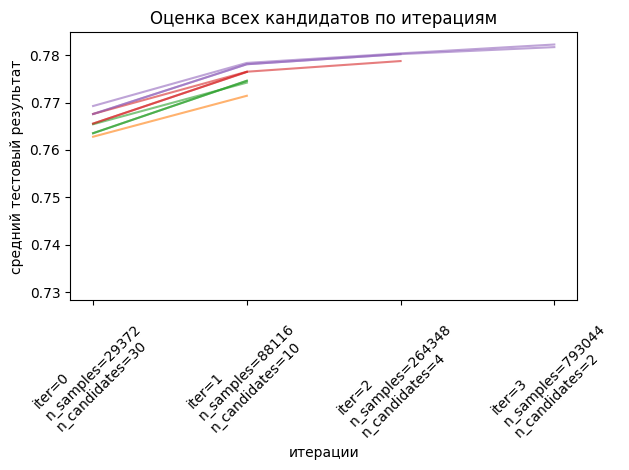

In [11]:
results = pd.DataFrame(knn_classifier.cv_results_)
results["params_str"] = results.params.apply(str)
results.drop_duplicates(subset=("params_str", "iter"), inplace=True)
mean_scores = results.pivot(
    index="iter", columns="params_str", values="mean_test_score"
)
ax = mean_scores.plot(legend=False, alpha=0.6)
labels = [
    f"iter={i}\nn_samples={knn_classifier.n_resources_[i]}\nn_candidates={knn_classifier.n_candidates_[i]}"
    for i in range(knn_classifier.n_iterations_)
]
ax.set_xticks(range(knn_classifier.n_iterations_))
ax.set_xticklabels(labels, rotation=45, multialignment="left")
ax.set_title("Оценка всех кандидатов по итерациям")
ax.set_ylabel("средний тестовый результат")
ax.set_xlabel("итерации")
plt.tight_layout()
plt.show()

In [12]:
print(
    f"Оптимальные параметры: {knn_classifier.best_params_}\nНаилучшая оценка: {knn_classifier.best_score_}"
)

Оптимальные параметры: {'knn__metric': 'manhattan', 'knn__n_neighbors': 14}
Наилучшая оценка: 0.7822590573825406


Оптимальные параметры: {'knn__metric': 'manhattan', 'knn__n_neighbors': 14}
Наилучшая оценка: 0.7822590573825406